# Project 1 TAA

## Expression Recognition with Keras

### Load datasets from file

In [2]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#to load matlab mat files
from scipy.io import loadmat
# for neural network
import tensorflow as tf
from tensorflow import keras

In [18]:
labelNames = ["happy", "sad"]

# Load Training data
mat=loadmat(f"../training_data_{'_'.join(labelNames)}.mat")
# mat is a dict with key "X" for x-values, and key "y" for y values
X, y = mat["X"], mat["y"]

# Load Dev Data
matDev=loadmat(f"../dev_data_{'_'.join(labelNames)}.mat")
X_valid, y_valid = mat["X"], mat["y"]

# Load Test Data
matDev=loadmat(f"../test_data_{'_'.join(labelNames)}.mat")
X_test, y_test = mat["X"], mat["y"]

In [19]:
# numbers
m = X.shape[0] # number of training examples
labels = np.max(y)+1 # number of labels
features = X.shape[1] # number of features per example

print(f"Loaded {m} traing examples with {labels} labels, each with {features} features (pixels).")
print("Labels are:", ', '.join(labelNames))

print()
print(f"Loaded {X_valid.shape[0]} dev examples.")
print(f"Loaded {X_test.shape[0]} test examples.")

Loaded 2000 traing examples with 2 labels, each with 2304 features (pixels).
Labels are: happy, sad

Loaded 2000 dev examples.
Loaded 2000 test examples.


### Some examples

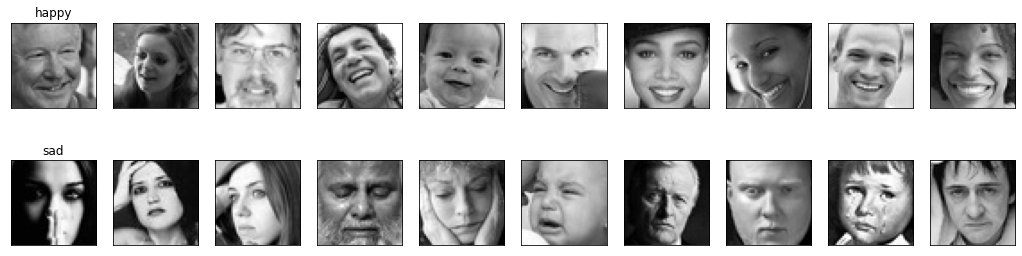

In [12]:
examplesNumber = 10
fig, axis = plt.subplots(labels,examplesNumber,figsize=(18,2*labels))
fig.subplots_adjust(top=1)

# Foreach label, output 10 random images
for i in range(labels):
    for j in range(examplesNumber):
        # Show image
        axis[i,j].imshow(X[np.random.randint((m/labels)*(i),(m/labels)*(i+1)+1),:].reshape(48,48,order="F").T, cmap="gray") 
        # Hide axes
        axis[i,j].set_xticks([])
        axis[i,j].set_yticks([])
        # Display title only on first
        if j==0:
            axis[i,j].set_title(labelNames[i])

### Normalize the dataset

In [6]:
X = X/255

### The neural network

Based on https://medium.com/nerd-for-tech/how-to-train-neural-networks-for-image-classification-part-1-21327fe1cc1

In [7]:
# Important variables
iterations = 5000
hiddenLayers=[300,200,100,50] # Array with number of neurons per hidden layer

#### Build the network

In [8]:
# Create model
modelSeq = []
# Flattens each image (48x48) to 1x2304
modelSeq.append(keras.layers.Flatten(input_shape = [48, 48]))
# Hidden layers with relu activation function
for h in hiddenLayers:
    modelSeq.append(keras.layers.Dense(h, activation = "relu" ))
# Output layer with softmax activation function
modelSeq.append(keras.layers.Dense(labels, activation = "softmax" ))

model = keras.models.Sequential(modelSeq)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               691500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 102       
Total params: 776,952
Trainable params: 776,952
Non-trainable params: 0
__________________________________________________

In [9]:
# Compile model

model.compile(
    # Using sparse categorical crossentropy loss function
    loss = "sparse_categorical_crossentropy",
    # Using stochastic gradient descent as gradient descent
    optimizer = "sgd",
    # In addition to cost, we want accuracy to help understanding how the model is working 
    metrics = ["accuracy"]
)

#### Train the network

In [10]:
history = model.fit(
    X,
    y,
    epochs = iterations,
    # batch_size = iteratios/10,
    validation_data = (X_valid, y_valid)
)

Epoch 1/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.6933 - accuracy: 0.4696 - val_loss: 0.6969 - val_accuracy: 0.4770
Epoch 2/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5024 - val_loss: 0.6969 - val_accuracy: 0.4800
Epoch 3/5000
63/63 [==============================] - 1s 11ms/step - loss: 0.6932 - accuracy: 0.4889 - val_loss: 0.6968 - val_accuracy: 0.4790
Epoch 4/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5178 - val_loss: 0.6967 - val_accuracy: 0.4795
Epoch 5/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5101 - val_loss: 0.6967 - val_accuracy: 0.4800
Epoch 6/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5071 - val_loss: 0.6965 - val_accuracy: 0.4835
Epoch 7/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5117 - val_loss: 0.6965 - val_accuracy: 0.4825
Epoch

63/63 [==============================] - 0s 7ms/step - loss: 0.6926 - accuracy: 0.5189 - val_loss: 0.7017 - val_accuracy: 0.5095
Epoch 109/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6923 - accuracy: 0.5381 - val_loss: 0.7025 - val_accuracy: 0.5085
Epoch 110/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6923 - accuracy: 0.5530 - val_loss: 0.7029 - val_accuracy: 0.5080
Epoch 111/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6925 - accuracy: 0.5338 - val_loss: 0.7023 - val_accuracy: 0.5085
Epoch 112/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6923 - accuracy: 0.5199 - val_loss: 0.7039 - val_accuracy: 0.5080
Epoch 113/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.5283 - val_loss: 0.7039 - val_accuracy: 0.5075
Epoch 114/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6920 - accuracy: 0.5401 - val_loss: 0.7059 - val_accuracy: 0.5070
Epoch 1

Epoch 165/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.6919 - accuracy: 0.5381 - val_loss: 0.7277 - val_accuracy: 0.5025
Epoch 166/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.6921 - accuracy: 0.5373 - val_loss: 0.7281 - val_accuracy: 0.5025
Epoch 167/5000
63/63 [==============================] - 1s 12ms/step - loss: 0.6919 - accuracy: 0.5356 - val_loss: 0.7304 - val_accuracy: 0.5025
Epoch 168/5000
63/63 [==============================] - 1s 11ms/step - loss: 0.6918 - accuracy: 0.5288 - val_loss: 0.7304 - val_accuracy: 0.5025
Epoch 169/5000
63/63 [==============================] - 1s 11ms/step - loss: 0.6920 - accuracy: 0.5350 - val_loss: 0.7311 - val_accuracy: 0.5025
Epoch 170/5000
63/63 [==============================] - 1s 11ms/step - loss: 0.6918 - accuracy: 0.5420 - val_loss: 0.7306 - val_accuracy: 0.5025
Epoch 171/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.6917 - accuracy: 0.5666 - val_loss: 0.7306 - val_accur

Epoch 222/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6912 - accuracy: 0.5520 - val_loss: 0.7989 - val_accuracy: 0.5005
Epoch 223/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6902 - accuracy: 0.5275 - val_loss: 0.8049 - val_accuracy: 0.5005
Epoch 224/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6901 - accuracy: 0.5409 - val_loss: 0.8030 - val_accuracy: 0.5005
Epoch 225/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6911 - accuracy: 0.5352 - val_loss: 0.8069 - val_accuracy: 0.5005
Epoch 226/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6902 - accuracy: 0.5665 - val_loss: 0.8110 - val_accuracy: 0.5005
Epoch 227/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6900 - accuracy: 0.5499 - val_loss: 0.8129 - val_accuracy: 0.5005
Epoch 228/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6900 - accuracy: 0.5665 - val_loss: 0.8219 - val_accuracy:

Epoch 279/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.6897 - accuracy: 0.5380 - val_loss: 1.0568 - val_accuracy: 0.5005
Epoch 280/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.6896 - accuracy: 0.5240 - val_loss: 1.0725 - val_accuracy: 0.5005
Epoch 281/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.6893 - accuracy: 0.5502 - val_loss: 1.0799 - val_accuracy: 0.5005
Epoch 282/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6895 - accuracy: 0.5331 - val_loss: 1.0919 - val_accuracy: 0.5005
Epoch 283/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6888 - accuracy: 0.5618 - val_loss: 1.0888 - val_accuracy: 0.5005
Epoch 284/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.6883 - accuracy: 0.5291 - val_loss: 1.1126 - val_accuracy: 0.5005
Epoch 285/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6887 - accuracy: 0.5504 - val_loss: 1.1185 - val_accuracy:

Epoch 336/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6852 - accuracy: 0.5716 - val_loss: 1.9209 - val_accuracy: 0.5005
Epoch 337/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6870 - accuracy: 0.5435 - val_loss: 1.9415 - val_accuracy: 0.5005
Epoch 338/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6824 - accuracy: 0.5693 - val_loss: 1.9611 - val_accuracy: 0.5005
Epoch 339/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6850 - accuracy: 0.5504 - val_loss: 2.0010 - val_accuracy: 0.5005
Epoch 340/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6851 - accuracy: 0.5382 - val_loss: 2.0614 - val_accuracy: 0.5005
Epoch 341/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6890 - accuracy: 0.5416 - val_loss: 2.0767 - val_accuracy: 0.5005
Epoch 342/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6856 - accuracy: 0.5700 - val_loss: 2.0770 - val_accuracy:

Epoch 393/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6826 - accuracy: 0.5670 - val_loss: 3.7353 - val_accuracy: 0.5005
Epoch 394/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6742 - accuracy: 0.5792 - val_loss: 3.8143 - val_accuracy: 0.5005
Epoch 395/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6845 - accuracy: 0.5649 - val_loss: 3.7987 - val_accuracy: 0.5005
Epoch 396/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6752 - accuracy: 0.5752 - val_loss: 3.8552 - val_accuracy: 0.5005
Epoch 397/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6805 - accuracy: 0.5682 - val_loss: 3.8819 - val_accuracy: 0.5005
Epoch 398/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6793 - accuracy: 0.5707 - val_loss: 3.9600 - val_accuracy: 0.5005
Epoch 399/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6839 - accuracy: 0.5469 - val_loss: 3.9967 - val_accuracy:

Epoch 450/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6723 - accuracy: 0.5693 - val_loss: 5.4414 - val_accuracy: 0.5005
Epoch 451/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.6728 - accuracy: 0.5823 - val_loss: 5.4994 - val_accuracy: 0.5005
Epoch 452/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6724 - accuracy: 0.5970 - val_loss: 5.4517 - val_accuracy: 0.5005
Epoch 453/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.6779 - accuracy: 0.5822 - val_loss: 5.5022 - val_accuracy: 0.5005
Epoch 454/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6862 - accuracy: 0.5473 - val_loss: 5.5155 - val_accuracy: 0.5005
Epoch 455/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6737 - accuracy: 0.5815 - val_loss: 5.5784 - val_accuracy: 0.5005
Epoch 456/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6737 - accuracy: 0.5777 - val_loss: 5.5640 - val_accuracy:

Epoch 507/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.6690 - accuracy: 0.5801 - val_loss: 6.2595 - val_accuracy: 0.5005
Epoch 508/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.6715 - accuracy: 0.5664 - val_loss: 6.2186 - val_accuracy: 0.5005
Epoch 509/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.6811 - accuracy: 0.5709 - val_loss: 6.3685 - val_accuracy: 0.5005
Epoch 510/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.6771 - accuracy: 0.5632 - val_loss: 6.2731 - val_accuracy: 0.5005
Epoch 511/5000
63/63 [==============================] - 1s 10ms/step - loss: 0.6707 - accuracy: 0.5861 - val_loss: 6.3098 - val_accuracy: 0.5005
Epoch 512/5000
63/63 [==============================] - 1s 10ms/step - loss: 0.6728 - accuracy: 0.5662 - val_loss: 6.3081 - val_accuracy: 0.5005
Epoch 513/5000
63/63 [==============================] - 1s 11ms/step - loss: 0.6742 - accuracy: 0.5654 - val_loss: 6.2707 - val_accura

Epoch 564/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6601 - accuracy: 0.6008 - val_loss: 6.5927 - val_accuracy: 0.5005
Epoch 565/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6689 - accuracy: 0.5856 - val_loss: 6.6167 - val_accuracy: 0.5005
Epoch 566/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6660 - accuracy: 0.5930 - val_loss: 6.6953 - val_accuracy: 0.5005
Epoch 567/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6678 - accuracy: 0.6075 - val_loss: 6.6541 - val_accuracy: 0.5005
Epoch 568/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6614 - accuracy: 0.5911 - val_loss: 6.6416 - val_accuracy: 0.5005
Epoch 569/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6648 - accuracy: 0.5918 - val_loss: 6.6932 - val_accuracy: 0.5005
Epoch 570/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6646 - accuracy: 0.5839 - val_loss: 6.7046 - val_accuracy:

Epoch 621/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.6716 - accuracy: 0.5948 - val_loss: 6.7693 - val_accuracy: 0.5005
Epoch 622/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.6730 - accuracy: 0.6010 - val_loss: 6.8491 - val_accuracy: 0.5005
Epoch 623/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6591 - accuracy: 0.5977 - val_loss: 6.8786 - val_accuracy: 0.5005
Epoch 624/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6623 - accuracy: 0.6077 - val_loss: 6.9258 - val_accuracy: 0.5005
Epoch 625/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6571 - accuracy: 0.5908 - val_loss: 6.8910 - val_accuracy: 0.5005
Epoch 626/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6571 - accuracy: 0.6168 - val_loss: 6.9198 - val_accuracy: 0.5005
Epoch 627/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.6702 - accuracy: 0.5854 - val_loss: 6.8727 - val_accuracy:

Epoch 678/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.6628 - accuracy: 0.5817 - val_loss: 6.9258 - val_accuracy: 0.5005
Epoch 679/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6658 - accuracy: 0.6002 - val_loss: 6.8468 - val_accuracy: 0.5005
Epoch 680/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6741 - accuracy: 0.5744 - val_loss: 6.9444 - val_accuracy: 0.5005
Epoch 681/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6618 - accuracy: 0.5858 - val_loss: 6.9712 - val_accuracy: 0.5005
Epoch 682/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6662 - accuracy: 0.6054 - val_loss: 6.8902 - val_accuracy: 0.5005
Epoch 683/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6680 - accuracy: 0.5927 - val_loss: 6.9386 - val_accuracy: 0.5005
Epoch 684/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6680 - accuracy: 0.6027 - val_loss: 6.8937 - val_accuracy:

Epoch 735/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6655 - accuracy: 0.5857 - val_loss: 6.8646 - val_accuracy: 0.5005
Epoch 736/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6716 - accuracy: 0.5868 - val_loss: 6.8751 - val_accuracy: 0.5005
Epoch 737/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6581 - accuracy: 0.6224 - val_loss: 6.8512 - val_accuracy: 0.5010
Epoch 738/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.6676 - accuracy: 0.5893 - val_loss: 6.9110 - val_accuracy: 0.5005
Epoch 739/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6554 - accuracy: 0.6190 - val_loss: 6.8529 - val_accuracy: 0.5010
Epoch 740/5000
63/63 [==============================] - 1s 10ms/step - loss: 0.6537 - accuracy: 0.6072 - val_loss: 6.9699 - val_accuracy: 0.5005
Epoch 741/5000
63/63 [==============================] - 1s 10ms/step - loss: 0.6768 - accuracy: 0.5854 - val_loss: 6.8946 - val_accurac

Epoch 792/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6630 - accuracy: 0.5985 - val_loss: 6.8602 - val_accuracy: 0.5010
Epoch 793/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6576 - accuracy: 0.6168 - val_loss: 6.8826 - val_accuracy: 0.5010
Epoch 794/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6535 - accuracy: 0.6279 - val_loss: 6.8409 - val_accuracy: 0.5010
Epoch 795/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6646 - accuracy: 0.5963 - val_loss: 6.8125 - val_accuracy: 0.5010
Epoch 796/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6544 - accuracy: 0.6008 - val_loss: 6.8424 - val_accuracy: 0.5010
Epoch 797/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6496 - accuracy: 0.6087 - val_loss: 6.9195 - val_accuracy: 0.5010
Epoch 798/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6498 - accuracy: 0.6082 - val_loss: 6.9369 - val_accuracy:

Epoch 849/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6536 - accuracy: 0.6129 - val_loss: 7.0639 - val_accuracy: 0.5020
Epoch 850/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6572 - accuracy: 0.6083 - val_loss: 6.9946 - val_accuracy: 0.5020
Epoch 851/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6583 - accuracy: 0.6105 - val_loss: 6.9680 - val_accuracy: 0.5020
Epoch 852/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6426 - accuracy: 0.6265 - val_loss: 7.0097 - val_accuracy: 0.5020
Epoch 853/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6529 - accuracy: 0.6104 - val_loss: 6.9789 - val_accuracy: 0.5020
Epoch 854/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.6512 - accuracy: 0.6069 - val_loss: 7.0535 - val_accuracy: 0.5020
Epoch 855/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6477 - accuracy: 0.6274 - val_loss: 7.0935 - val_accuracy:

Epoch 906/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.6484 - accuracy: 0.6138 - val_loss: 6.9081 - val_accuracy: 0.5020
Epoch 907/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6598 - accuracy: 0.6006 - val_loss: 6.8821 - val_accuracy: 0.5020
Epoch 908/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.6604 - accuracy: 0.5982 - val_loss: 6.9263 - val_accuracy: 0.5020
Epoch 909/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.6392 - accuracy: 0.6467 - val_loss: 6.8974 - val_accuracy: 0.5020
Epoch 910/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.6552 - accuracy: 0.5994 - val_loss: 6.8901 - val_accuracy: 0.5020
Epoch 911/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6454 - accuracy: 0.6281 - val_loss: 6.8505 - val_accuracy: 0.5020
Epoch 912/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.6561 - accuracy: 0.5989 - val_loss: 6.8946 - val_accuracy:

Epoch 963/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.6501 - accuracy: 0.6100 - val_loss: 6.9842 - val_accuracy: 0.5025
Epoch 964/5000
63/63 [==============================] - 1s 10ms/step - loss: 0.6497 - accuracy: 0.6169 - val_loss: 6.8824 - val_accuracy: 0.5025
Epoch 965/5000
63/63 [==============================] - 1s 11ms/step - loss: 0.6399 - accuracy: 0.6216 - val_loss: 6.8610 - val_accuracy: 0.5025
Epoch 966/5000
63/63 [==============================] - 1s 12ms/step - loss: 0.6500 - accuracy: 0.6132 - val_loss: 7.0207 - val_accuracy: 0.5030
Epoch 967/5000
63/63 [==============================] - 1s 13ms/step - loss: 0.6492 - accuracy: 0.6212 - val_loss: 6.9134 - val_accuracy: 0.5025
Epoch 968/5000
63/63 [==============================] - 1s 11ms/step - loss: 0.6392 - accuracy: 0.6244 - val_loss: 6.9795 - val_accuracy: 0.5025
Epoch 969/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.6632 - accuracy: 0.6088 - val_loss: 6.8153 - val_accu

Epoch 1020/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6375 - accuracy: 0.6473 - val_loss: 6.9741 - val_accuracy: 0.5025
Epoch 1021/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.6500 - accuracy: 0.6170 - val_loss: 6.9264 - val_accuracy: 0.5020
Epoch 1022/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6335 - accuracy: 0.6321 - val_loss: 7.0995 - val_accuracy: 0.5020
Epoch 1023/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6512 - accuracy: 0.6148 - val_loss: 6.9902 - val_accuracy: 0.5025
Epoch 1024/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6424 - accuracy: 0.6344 - val_loss: 6.9910 - val_accuracy: 0.5025
Epoch 1025/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6365 - accuracy: 0.6311 - val_loss: 6.9631 - val_accuracy: 0.5025
Epoch 1026/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6421 - accuracy: 0.6239 - val_loss: 6.9491 - val_ac

63/63 [==============================] - 0s 7ms/step - loss: 0.6462 - accuracy: 0.6108 - val_loss: 6.9572 - val_accuracy: 0.5085
Epoch 1133/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6468 - accuracy: 0.6153 - val_loss: 6.8980 - val_accuracy: 0.5085
Epoch 1134/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6327 - accuracy: 0.6344 - val_loss: 7.0545 - val_accuracy: 0.5080
Epoch 1135/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6379 - accuracy: 0.6449 - val_loss: 6.9694 - val_accuracy: 0.5085
Epoch 1136/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6365 - accuracy: 0.6270 - val_loss: 6.9644 - val_accuracy: 0.5085
Epoch 1137/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6323 - accuracy: 0.6411 - val_loss: 6.8899 - val_accuracy: 0.5085
Epoch 1138/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6305 - accuracy: 0.6492 - val_loss: 7.0244 - val_accuracy: 0.5085
E

63/63 [==============================] - 1s 11ms/step - loss: 0.6422 - accuracy: 0.6202 - val_loss: 6.9191 - val_accuracy: 0.5170
Epoch 1245/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.6418 - accuracy: 0.6334 - val_loss: 6.7687 - val_accuracy: 0.5175
Epoch 1246/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.6219 - accuracy: 0.6492 - val_loss: 6.8225 - val_accuracy: 0.5175
Epoch 1247/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.6396 - accuracy: 0.6320 - val_loss: 6.8879 - val_accuracy: 0.5170
Epoch 1248/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.6316 - accuracy: 0.6499 - val_loss: 6.7616 - val_accuracy: 0.5175
Epoch 1249/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.6347 - accuracy: 0.6332 - val_loss: 6.7737 - val_accuracy: 0.5175
Epoch 1250/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.6442 - accuracy: 0.6426 - val_loss: 6.8438 - val_accuracy: 0.5170


63/63 [==============================] - 0s 6ms/step - loss: 0.6311 - accuracy: 0.6423 - val_loss: 6.7557 - val_accuracy: 0.5190
Epoch 1357/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6185 - accuracy: 0.6484 - val_loss: 6.7287 - val_accuracy: 0.5190
Epoch 1358/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6231 - accuracy: 0.6615 - val_loss: 6.8277 - val_accuracy: 0.5190
Epoch 1359/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6432 - accuracy: 0.6309 - val_loss: 6.6472 - val_accuracy: 0.5190
Epoch 1360/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6367 - accuracy: 0.6264 - val_loss: 6.7339 - val_accuracy: 0.5190
Epoch 1361/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6151 - accuracy: 0.6572 - val_loss: 6.7469 - val_accuracy: 0.5190
Epoch 1362/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6302 - accuracy: 0.6553 - val_loss: 6.7846 - val_accuracy: 0.5190
E

63/63 [==============================] - 0s 8ms/step - loss: 0.6324 - accuracy: 0.6398 - val_loss: 6.5815 - val_accuracy: 0.5250
Epoch 1469/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6277 - accuracy: 0.6437 - val_loss: 6.7873 - val_accuracy: 0.5210
Epoch 1470/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6376 - accuracy: 0.6439 - val_loss: 6.7608 - val_accuracy: 0.5210
Epoch 1471/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.6191 - accuracy: 0.6619 - val_loss: 6.9223 - val_accuracy: 0.5210
Epoch 1472/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6237 - accuracy: 0.6549 - val_loss: 6.8284 - val_accuracy: 0.5225
Epoch 1473/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6214 - accuracy: 0.6539 - val_loss: 6.9735 - val_accuracy: 0.5200
Epoch 1474/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6435 - accuracy: 0.6336 - val_loss: 6.8941 - val_accuracy: 0.5210
E

63/63 [==============================] - 1s 8ms/step - loss: 0.6159 - accuracy: 0.6548 - val_loss: 7.0840 - val_accuracy: 0.5290
Epoch 1581/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6203 - accuracy: 0.6594 - val_loss: 7.0360 - val_accuracy: 0.5290
Epoch 1582/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.6181 - accuracy: 0.6562 - val_loss: 6.9971 - val_accuracy: 0.5310
Epoch 1583/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6072 - accuracy: 0.6715 - val_loss: 7.1232 - val_accuracy: 0.5290
Epoch 1584/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6294 - accuracy: 0.6334 - val_loss: 6.8563 - val_accuracy: 0.5320
Epoch 1585/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6065 - accuracy: 0.6738 - val_loss: 6.9384 - val_accuracy: 0.5310
Epoch 1586/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6175 - accuracy: 0.6530 - val_loss: 6.9030 - val_accuracy: 0.5310
E

63/63 [==============================] - 0s 8ms/step - loss: 0.6252 - accuracy: 0.6633 - val_loss: 6.8020 - val_accuracy: 0.5365
Epoch 1693/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6112 - accuracy: 0.6682 - val_loss: 6.9690 - val_accuracy: 0.5350
Epoch 1694/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6291 - accuracy: 0.6599 - val_loss: 6.8814 - val_accuracy: 0.5350
Epoch 1695/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6324 - accuracy: 0.6411 - val_loss: 6.8076 - val_accuracy: 0.5355
Epoch 1696/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6257 - accuracy: 0.6536 - val_loss: 6.8744 - val_accuracy: 0.5350
Epoch 1697/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6047 - accuracy: 0.6638 - val_loss: 6.9369 - val_accuracy: 0.5350
Epoch 1698/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6225 - accuracy: 0.6364 - val_loss: 7.0587 - val_accuracy: 0.5350
E

63/63 [==============================] - 1s 12ms/step - loss: 0.6007 - accuracy: 0.6815 - val_loss: 6.9761 - val_accuracy: 0.5420
Epoch 1805/5000
63/63 [==============================] - 1s 17ms/step - loss: 0.6070 - accuracy: 0.6561 - val_loss: 6.8759 - val_accuracy: 0.5440
Epoch 1806/5000
63/63 [==============================] - 1s 15ms/step - loss: 0.6287 - accuracy: 0.6396 - val_loss: 6.8233 - val_accuracy: 0.5445
Epoch 1807/5000
63/63 [==============================] - 1s 12ms/step - loss: 0.6181 - accuracy: 0.6547 - val_loss: 7.0090 - val_accuracy: 0.5420
Epoch 1808/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.5999 - accuracy: 0.6776 - val_loss: 6.8639 - val_accuracy: 0.5450
Epoch 1809/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.6407 - accuracy: 0.6434 - val_loss: 7.0817 - val_accuracy: 0.5415
Epoch 1810/5000
63/63 [==============================] - 1s 10ms/step - loss: 0.6185 - accuracy: 0.6525 - val_loss: 7.0943 - val_accuracy: 0.5

63/63 [==============================] - 0s 6ms/step - loss: 0.6201 - accuracy: 0.6714 - val_loss: 7.2209 - val_accuracy: 0.5470
Epoch 1917/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6149 - accuracy: 0.6538 - val_loss: 7.1319 - val_accuracy: 0.5490
Epoch 1918/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6029 - accuracy: 0.6753 - val_loss: 7.3034 - val_accuracy: 0.5485
Epoch 1919/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.6138 - accuracy: 0.6705 - val_loss: 7.1759 - val_accuracy: 0.5490
Epoch 1920/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.5917 - accuracy: 0.6975 - val_loss: 7.1194 - val_accuracy: 0.5520
Epoch 1921/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6122 - accuracy: 0.6592 - val_loss: 7.0194 - val_accuracy: 0.5515
Epoch 1922/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6254 - accuracy: 0.6440 - val_loss: 7.0817 - val_accuracy: 0.5505
E

63/63 [==============================] - 0s 6ms/step - loss: 0.5990 - accuracy: 0.6658 - val_loss: 7.5533 - val_accuracy: 0.5545
Epoch 2029/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6345 - accuracy: 0.6438 - val_loss: 7.5674 - val_accuracy: 0.5535
Epoch 2030/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6069 - accuracy: 0.6743 - val_loss: 7.5575 - val_accuracy: 0.5545
Epoch 2031/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6175 - accuracy: 0.6546 - val_loss: 7.5625 - val_accuracy: 0.5535
Epoch 2032/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6306 - accuracy: 0.6405 - val_loss: 7.5156 - val_accuracy: 0.5535
Epoch 2033/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6000 - accuracy: 0.6797 - val_loss: 7.4352 - val_accuracy: 0.5550
Epoch 2034/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5958 - accuracy: 0.6822 - val_loss: 7.4056 - val_accuracy: 0.5560
E

63/63 [==============================] - 1s 10ms/step - loss: 0.6026 - accuracy: 0.6637 - val_loss: 7.5211 - val_accuracy: 0.5625
Epoch 2141/5000
63/63 [==============================] - 1s 10ms/step - loss: 0.6306 - accuracy: 0.6652 - val_loss: 7.8642 - val_accuracy: 0.5580
Epoch 2142/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6079 - accuracy: 0.6658 - val_loss: 7.8104 - val_accuracy: 0.5580
Epoch 2143/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6036 - accuracy: 0.6772 - val_loss: 7.7704 - val_accuracy: 0.5590
Epoch 2144/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.6068 - accuracy: 0.6719 - val_loss: 7.8903 - val_accuracy: 0.5590
Epoch 2145/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6164 - accuracy: 0.6582 - val_loss: 7.8922 - val_accuracy: 0.5590
Epoch 2146/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5881 - accuracy: 0.6912 - val_loss: 7.9410 - val_accuracy: 0.5585

63/63 [==============================] - 0s 7ms/step - loss: 0.6140 - accuracy: 0.6562 - val_loss: 7.9185 - val_accuracy: 0.5645
Epoch 2253/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5913 - accuracy: 0.6898 - val_loss: 8.0613 - val_accuracy: 0.5630
Epoch 2254/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6014 - accuracy: 0.6728 - val_loss: 8.0404 - val_accuracy: 0.5625
Epoch 2255/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6107 - accuracy: 0.6878 - val_loss: 7.8314 - val_accuracy: 0.5665
Epoch 2256/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6190 - accuracy: 0.6591 - val_loss: 7.8394 - val_accuracy: 0.5650
Epoch 2257/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.6073 - accuracy: 0.6657 - val_loss: 7.8962 - val_accuracy: 0.5650
Epoch 2258/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6095 - accuracy: 0.6627 - val_loss: 7.9597 - val_accuracy: 0.5635
E

63/63 [==============================] - 0s 6ms/step - loss: 0.5750 - accuracy: 0.7024 - val_loss: 8.1807 - val_accuracy: 0.5700
Epoch 2365/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5935 - accuracy: 0.6765 - val_loss: 8.0854 - val_accuracy: 0.5715
Epoch 2366/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5890 - accuracy: 0.6790 - val_loss: 8.2038 - val_accuracy: 0.5705
Epoch 2367/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6052 - accuracy: 0.6853 - val_loss: 8.1643 - val_accuracy: 0.5690
Epoch 2368/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5893 - accuracy: 0.6851 - val_loss: 8.1594 - val_accuracy: 0.5700
Epoch 2369/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5952 - accuracy: 0.6837 - val_loss: 8.2171 - val_accuracy: 0.5705
Epoch 2370/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5866 - accuracy: 0.6872 - val_loss: 8.1875 - val_accuracy: 0.5695
E

63/63 [==============================] - 0s 7ms/step - loss: 0.5951 - accuracy: 0.6769 - val_loss: 8.4877 - val_accuracy: 0.5700
Epoch 2477/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5685 - accuracy: 0.7003 - val_loss: 8.5966 - val_accuracy: 0.5715
Epoch 2478/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5794 - accuracy: 0.6856 - val_loss: 8.5685 - val_accuracy: 0.5735
Epoch 2479/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5916 - accuracy: 0.6853 - val_loss: 8.5452 - val_accuracy: 0.5725
Epoch 2480/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6188 - accuracy: 0.6553 - val_loss: 8.4947 - val_accuracy: 0.5700
Epoch 2481/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6009 - accuracy: 0.6831 - val_loss: 8.4015 - val_accuracy: 0.5730
Epoch 2482/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5927 - accuracy: 0.6757 - val_loss: 8.4626 - val_accuracy: 0.5720
E

63/63 [==============================] - 0s 8ms/step - loss: 0.5806 - accuracy: 0.6952 - val_loss: 8.8158 - val_accuracy: 0.5755
Epoch 2589/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6072 - accuracy: 0.6640 - val_loss: 8.8032 - val_accuracy: 0.5755
Epoch 2590/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5781 - accuracy: 0.6912 - val_loss: 8.7978 - val_accuracy: 0.5760
Epoch 2591/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6146 - accuracy: 0.6590 - val_loss: 9.0622 - val_accuracy: 0.5720
Epoch 2592/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6050 - accuracy: 0.6708 - val_loss: 8.8631 - val_accuracy: 0.5760
Epoch 2593/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5877 - accuracy: 0.6955 - val_loss: 8.8657 - val_accuracy: 0.5755
Epoch 2594/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5871 - accuracy: 0.6853 - val_loss: 9.0104 - val_accuracy: 0.5725
E

63/63 [==============================] - 0s 6ms/step - loss: 0.5710 - accuracy: 0.7024 - val_loss: 9.1701 - val_accuracy: 0.5840
Epoch 2701/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6036 - accuracy: 0.6748 - val_loss: 9.0447 - val_accuracy: 0.5850
Epoch 2702/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6015 - accuracy: 0.6819 - val_loss: 9.0928 - val_accuracy: 0.5835
Epoch 2703/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5685 - accuracy: 0.7043 - val_loss: 9.3774 - val_accuracy: 0.5800
Epoch 2704/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5997 - accuracy: 0.6986 - val_loss: 9.0845 - val_accuracy: 0.5850
Epoch 2705/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5682 - accuracy: 0.6975 - val_loss: 9.2658 - val_accuracy: 0.5820
Epoch 2706/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.5908 - accuracy: 0.6868 - val_loss: 9.0472 - val_accuracy: 0.5850
E

63/63 [==============================] - 0s 7ms/step - loss: 0.5894 - accuracy: 0.6806 - val_loss: 9.3202 - val_accuracy: 0.5895
Epoch 2813/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5811 - accuracy: 0.7057 - val_loss: 9.5825 - val_accuracy: 0.5855
Epoch 2814/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5907 - accuracy: 0.6906 - val_loss: 9.4928 - val_accuracy: 0.5895
Epoch 2815/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6052 - accuracy: 0.6783 - val_loss: 9.5316 - val_accuracy: 0.5860
Epoch 2816/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5807 - accuracy: 0.6973 - val_loss: 9.3806 - val_accuracy: 0.5905
Epoch 2817/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6222 - accuracy: 0.6662 - val_loss: 9.4736 - val_accuracy: 0.5860
Epoch 2818/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5771 - accuracy: 0.7077 - val_loss: 9.4950 - val_accuracy: 0.5865
E

63/63 [==============================] - 0s 5ms/step - loss: 0.6031 - accuracy: 0.6836 - val_loss: 9.5561 - val_accuracy: 0.5940
Epoch 2925/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5661 - accuracy: 0.6976 - val_loss: 9.6579 - val_accuracy: 0.5915
Epoch 2926/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5999 - accuracy: 0.6798 - val_loss: 9.6476 - val_accuracy: 0.5920
Epoch 2927/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.6293 - accuracy: 0.6630 - val_loss: 9.4652 - val_accuracy: 0.5940
Epoch 2928/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.5702 - accuracy: 0.7190 - val_loss: 9.5070 - val_accuracy: 0.5940
Epoch 2929/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.5785 - accuracy: 0.6964 - val_loss: 9.5539 - val_accuracy: 0.5925
Epoch 2930/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5646 - accuracy: 0.7141 - val_loss: 9.4382 - val_accuracy: 0.5950
E

63/63 [==============================] - 0s 5ms/step - loss: 0.6036 - accuracy: 0.6680 - val_loss: 9.8122 - val_accuracy: 0.5970
Epoch 3037/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.5717 - accuracy: 0.7045 - val_loss: 9.7353 - val_accuracy: 0.5975
Epoch 3038/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.5941 - accuracy: 0.6706 - val_loss: 9.9215 - val_accuracy: 0.5960
Epoch 3039/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.5784 - accuracy: 0.6981 - val_loss: 9.8141 - val_accuracy: 0.5975
Epoch 3040/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5753 - accuracy: 0.6985 - val_loss: 9.7978 - val_accuracy: 0.5960
Epoch 3041/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5751 - accuracy: 0.6904 - val_loss: 9.7602 - val_accuracy: 0.5975
Epoch 3042/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5532 - accuracy: 0.7323 - val_loss: 9.7086 - val_accuracy: 0.5980
E

63/63 [==============================] - 0s 5ms/step - loss: 0.5913 - accuracy: 0.6803 - val_loss: 10.0820 - val_accuracy: 0.5965
Epoch 3149/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.5799 - accuracy: 0.7107 - val_loss: 10.0139 - val_accuracy: 0.5980
Epoch 3150/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.5690 - accuracy: 0.6995 - val_loss: 9.9830 - val_accuracy: 0.5995
Epoch 3151/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.5578 - accuracy: 0.7288 - val_loss: 9.8579 - val_accuracy: 0.6020
Epoch 3152/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.5671 - accuracy: 0.7056 - val_loss: 9.9956 - val_accuracy: 0.6000
Epoch 3153/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.5762 - accuracy: 0.6991 - val_loss: 10.1039 - val_accuracy: 0.5965
Epoch 3154/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.6040 - accuracy: 0.6830 - val_loss: 9.6868 - val_accuracy: 0.603

63/63 [==============================] - 0s 6ms/step - loss: 0.5552 - accuracy: 0.7255 - val_loss: 10.4567 - val_accuracy: 0.6005
Epoch 3261/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5663 - accuracy: 0.7124 - val_loss: 10.4689 - val_accuracy: 0.6000
Epoch 3262/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.5847 - accuracy: 0.6884 - val_loss: 10.1191 - val_accuracy: 0.6040
Epoch 3263/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.5675 - accuracy: 0.7048 - val_loss: 10.1979 - val_accuracy: 0.6030
Epoch 3264/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.5569 - accuracy: 0.7268 - val_loss: 10.1530 - val_accuracy: 0.6035
Epoch 3265/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.5689 - accuracy: 0.7075 - val_loss: 10.3592 - val_accuracy: 0.6030
Epoch 3266/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.5806 - accuracy: 0.6962 - val_loss: 10.4784 - val_accuracy: 0

63/63 [==============================] - 0s 7ms/step - loss: 0.5788 - accuracy: 0.6795 - val_loss: 10.5830 - val_accuracy: 0.6045
Epoch 3373/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5961 - accuracy: 0.6929 - val_loss: 10.3402 - val_accuracy: 0.6060
Epoch 3374/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5928 - accuracy: 0.6823 - val_loss: 10.3997 - val_accuracy: 0.6060
Epoch 3375/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5514 - accuracy: 0.7120 - val_loss: 10.4886 - val_accuracy: 0.6060
Epoch 3376/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5871 - accuracy: 0.7031 - val_loss: 10.7685 - val_accuracy: 0.6050
Epoch 3377/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5881 - accuracy: 0.6789 - val_loss: 10.4448 - val_accuracy: 0.6065
Epoch 3378/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.5533 - accuracy: 0.7178 - val_loss: 10.5284 - val_accuracy: 0

63/63 [==============================] - 0s 8ms/step - loss: 0.5916 - accuracy: 0.6919 - val_loss: 11.1781 - val_accuracy: 0.6055
Epoch 3485/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.6062 - accuracy: 0.6750 - val_loss: 11.0872 - val_accuracy: 0.6060
Epoch 3486/5000
63/63 [==============================] - 1s 10ms/step - loss: 0.5616 - accuracy: 0.7087 - val_loss: 11.0812 - val_accuracy: 0.6065
Epoch 3487/5000
63/63 [==============================] - 1s 10ms/step - loss: 0.5733 - accuracy: 0.7062 - val_loss: 10.8156 - val_accuracy: 0.6085
Epoch 3488/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.5694 - accuracy: 0.6996 - val_loss: 11.1558 - val_accuracy: 0.6050
Epoch 3489/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.5561 - accuracy: 0.7291 - val_loss: 11.2385 - val_accuracy: 0.6050
Epoch 3490/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5767 - accuracy: 0.6895 - val_loss: 10.8142 - val_accuracy:

63/63 [==============================] - 0s 6ms/step - loss: 0.5557 - accuracy: 0.7237 - val_loss: 11.4458 - val_accuracy: 0.6080
Epoch 3597/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5647 - accuracy: 0.7147 - val_loss: 11.3906 - val_accuracy: 0.6095
Epoch 3598/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5570 - accuracy: 0.7180 - val_loss: 11.3261 - val_accuracy: 0.6105
Epoch 3599/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5662 - accuracy: 0.6991 - val_loss: 11.5137 - val_accuracy: 0.6090
Epoch 3600/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5544 - accuracy: 0.7145 - val_loss: 11.9283 - val_accuracy: 0.6045
Epoch 3601/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5829 - accuracy: 0.6833 - val_loss: 11.6958 - val_accuracy: 0.6055
Epoch 3602/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5565 - accuracy: 0.7157 - val_loss: 11.8737 - val_accuracy: 0

63/63 [==============================] - 0s 8ms/step - loss: 0.5601 - accuracy: 0.6983 - val_loss: 12.3172 - val_accuracy: 0.6045
Epoch 3709/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5621 - accuracy: 0.7155 - val_loss: 12.2566 - val_accuracy: 0.6030
Epoch 3710/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5937 - accuracy: 0.6886 - val_loss: 12.1750 - val_accuracy: 0.6040
Epoch 3711/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5755 - accuracy: 0.7090 - val_loss: 12.4097 - val_accuracy: 0.6020
Epoch 3712/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5504 - accuracy: 0.7232 - val_loss: 12.3049 - val_accuracy: 0.6035
Epoch 3713/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5747 - accuracy: 0.6916 - val_loss: 12.1188 - val_accuracy: 0.6040
Epoch 3714/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5521 - accuracy: 0.7206 - val_loss: 11.9701 - val_accuracy: 0

63/63 [==============================] - 0s 7ms/step - loss: 0.5532 - accuracy: 0.7105 - val_loss: 12.0391 - val_accuracy: 0.6130
Epoch 3821/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5419 - accuracy: 0.7201 - val_loss: 11.9287 - val_accuracy: 0.6130
Epoch 3822/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5590 - accuracy: 0.7258 - val_loss: 12.0528 - val_accuracy: 0.6130
Epoch 3823/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5590 - accuracy: 0.7160 - val_loss: 11.9697 - val_accuracy: 0.6130
Epoch 3824/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5684 - accuracy: 0.7045 - val_loss: 12.0194 - val_accuracy: 0.6130
Epoch 3825/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5328 - accuracy: 0.7388 - val_loss: 12.2155 - val_accuracy: 0.6120
Epoch 3826/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.5696 - accuracy: 0.7032 - val_loss: 12.0349 - val_accuracy: 0

63/63 [==============================] - 0s 7ms/step - loss: 0.5553 - accuracy: 0.7209 - val_loss: 12.8747 - val_accuracy: 0.6105
Epoch 3933/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.5463 - accuracy: 0.7348 - val_loss: 12.7227 - val_accuracy: 0.6120
Epoch 3934/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.5948 - accuracy: 0.6839 - val_loss: 12.6159 - val_accuracy: 0.6115
Epoch 3935/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5610 - accuracy: 0.7034 - val_loss: 12.6470 - val_accuracy: 0.6120
Epoch 3936/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5528 - accuracy: 0.7116 - val_loss: 12.8039 - val_accuracy: 0.6115
Epoch 3937/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5699 - accuracy: 0.7041 - val_loss: 12.7672 - val_accuracy: 0.6110
Epoch 3938/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5364 - accuracy: 0.7253 - val_loss: 12.9859 - val_accuracy: 0

63/63 [==============================] - 1s 8ms/step - loss: 0.5354 - accuracy: 0.7261 - val_loss: 13.1819 - val_accuracy: 0.6160
Epoch 4045/5000
63/63 [==============================] - 1s 9ms/step - loss: 0.5563 - accuracy: 0.7125 - val_loss: 13.3943 - val_accuracy: 0.6135
Epoch 4046/5000
63/63 [==============================] - 1s 10ms/step - loss: 0.5412 - accuracy: 0.7319 - val_loss: 13.5948 - val_accuracy: 0.6115
Epoch 4047/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.5569 - accuracy: 0.7133 - val_loss: 13.6502 - val_accuracy: 0.6120
Epoch 4048/5000
63/63 [==============================] - 1s 10ms/step - loss: 0.5487 - accuracy: 0.7388 - val_loss: 13.4969 - val_accuracy: 0.6130
Epoch 4049/5000
63/63 [==============================] - 1s 10ms/step - loss: 0.5389 - accuracy: 0.7186 - val_loss: 13.6516 - val_accuracy: 0.6120
Epoch 4050/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.5098 - accuracy: 0.7492 - val_loss: 13.6828 - val_accuracy

63/63 [==============================] - 0s 6ms/step - loss: 0.5215 - accuracy: 0.7538 - val_loss: 13.7415 - val_accuracy: 0.6190
Epoch 4157/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5240 - accuracy: 0.7472 - val_loss: 13.6456 - val_accuracy: 0.6215
Epoch 4158/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5548 - accuracy: 0.7177 - val_loss: 13.8192 - val_accuracy: 0.6195
Epoch 4159/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5247 - accuracy: 0.7476 - val_loss: 14.0908 - val_accuracy: 0.6180
Epoch 4160/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5692 - accuracy: 0.6962 - val_loss: 13.9763 - val_accuracy: 0.6180
Epoch 4161/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5480 - accuracy: 0.7139 - val_loss: 13.9135 - val_accuracy: 0.6185
Epoch 4162/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5398 - accuracy: 0.7288 - val_loss: 13.9215 - val_accuracy: 0

63/63 [==============================] - 0s 6ms/step - loss: 0.5247 - accuracy: 0.7471 - val_loss: 13.9989 - val_accuracy: 0.6240
Epoch 4269/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5643 - accuracy: 0.6966 - val_loss: 13.8970 - val_accuracy: 0.6275
Epoch 4270/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5279 - accuracy: 0.7338 - val_loss: 13.9369 - val_accuracy: 0.6275
Epoch 4271/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5209 - accuracy: 0.7475 - val_loss: 13.9951 - val_accuracy: 0.6275
Epoch 4272/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5405 - accuracy: 0.7208 - val_loss: 14.3616 - val_accuracy: 0.6220
Epoch 4273/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5484 - accuracy: 0.7160 - val_loss: 14.1825 - val_accuracy: 0.6235
Epoch 4274/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5283 - accuracy: 0.7360 - val_loss: 14.1648 - val_accuracy: 0

63/63 [==============================] - 0s 6ms/step - loss: 0.5372 - accuracy: 0.7207 - val_loss: 14.3782 - val_accuracy: 0.6240
Epoch 4381/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.5432 - accuracy: 0.7036 - val_loss: 14.3397 - val_accuracy: 0.6235
Epoch 4382/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.5088 - accuracy: 0.7541 - val_loss: 14.2499 - val_accuracy: 0.6305
Epoch 4383/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.5585 - accuracy: 0.7169 - val_loss: 13.8114 - val_accuracy: 0.6365
Epoch 4384/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5836 - accuracy: 0.6991 - val_loss: 14.3691 - val_accuracy: 0.6275
Epoch 4385/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5392 - accuracy: 0.7408 - val_loss: 14.2904 - val_accuracy: 0.6280
Epoch 4386/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5374 - accuracy: 0.7315 - val_loss: 14.3390 - val_accuracy: 0

63/63 [==============================] - 0s 6ms/step - loss: 0.5502 - accuracy: 0.7093 - val_loss: 14.3621 - val_accuracy: 0.6380
Epoch 4493/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5245 - accuracy: 0.7392 - val_loss: 14.5191 - val_accuracy: 0.6350
Epoch 4494/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5241 - accuracy: 0.7368 - val_loss: 14.6182 - val_accuracy: 0.6325
Epoch 4495/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5564 - accuracy: 0.7070 - val_loss: 14.3004 - val_accuracy: 0.6380
Epoch 4496/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5524 - accuracy: 0.7204 - val_loss: 14.5352 - val_accuracy: 0.6335
Epoch 4497/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5398 - accuracy: 0.7217 - val_loss: 14.5216 - val_accuracy: 0.6370
Epoch 4498/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5112 - accuracy: 0.7530 - val_loss: 14.2033 - val_accuracy: 0

63/63 [==============================] - 0s 6ms/step - loss: 0.5555 - accuracy: 0.7319 - val_loss: 14.8281 - val_accuracy: 0.6405
Epoch 4605/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5347 - accuracy: 0.7198 - val_loss: 14.9520 - val_accuracy: 0.6375
Epoch 4606/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5296 - accuracy: 0.7338 - val_loss: 14.6395 - val_accuracy: 0.6415
Epoch 4607/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5523 - accuracy: 0.7188 - val_loss: 14.4342 - val_accuracy: 0.6430
Epoch 4608/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.5311 - accuracy: 0.7269 - val_loss: 14.3757 - val_accuracy: 0.6445
Epoch 4609/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.5333 - accuracy: 0.7210 - val_loss: 14.4430 - val_accuracy: 0.6435
Epoch 4610/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.5450 - accuracy: 0.7094 - val_loss: 14.6662 - val_accuracy: 0

63/63 [==============================] - 0s 6ms/step - loss: 0.5440 - accuracy: 0.7206 - val_loss: 14.9658 - val_accuracy: 0.6495
Epoch 4717/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5551 - accuracy: 0.7303 - val_loss: 14.6397 - val_accuracy: 0.6510
Epoch 4718/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.4981 - accuracy: 0.7642 - val_loss: 15.1462 - val_accuracy: 0.6470
Epoch 4719/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5232 - accuracy: 0.7400 - val_loss: 15.1545 - val_accuracy: 0.6460
Epoch 4720/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5383 - accuracy: 0.7088 - val_loss: 14.7786 - val_accuracy: 0.6505
Epoch 4721/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.5106 - accuracy: 0.7521 - val_loss: 14.7120 - val_accuracy: 0.6500
Epoch 4722/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.5193 - accuracy: 0.7358 - val_loss: 14.8751 - val_accuracy: 0

63/63 [==============================] - 0s 8ms/step - loss: 0.5414 - accuracy: 0.7175 - val_loss: 13.9769 - val_accuracy: 0.6600
Epoch 4829/5000
63/63 [==============================] - 1s 8ms/step - loss: 0.5376 - accuracy: 0.7270 - val_loss: 14.1363 - val_accuracy: 0.6585
Epoch 4830/5000
63/63 [==============================] - 0s 8ms/step - loss: 0.5078 - accuracy: 0.7505 - val_loss: 13.9719 - val_accuracy: 0.6595
Epoch 4831/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5085 - accuracy: 0.7464 - val_loss: 13.5977 - val_accuracy: 0.6620
Epoch 4832/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5566 - accuracy: 0.7192 - val_loss: 14.3006 - val_accuracy: 0.6555
Epoch 4833/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5439 - accuracy: 0.7199 - val_loss: 13.9374 - val_accuracy: 0.6595
Epoch 4834/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5232 - accuracy: 0.7494 - val_loss: 13.6657 - val_accuracy: 0

63/63 [==============================] - 0s 6ms/step - loss: 0.5382 - accuracy: 0.7316 - val_loss: 13.5726 - val_accuracy: 0.6695
Epoch 4941/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5439 - accuracy: 0.7320 - val_loss: 13.8070 - val_accuracy: 0.6690
Epoch 4942/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5464 - accuracy: 0.7230 - val_loss: 14.2017 - val_accuracy: 0.6650
Epoch 4943/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5105 - accuracy: 0.7411 - val_loss: 13.9517 - val_accuracy: 0.6675
Epoch 4944/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5351 - accuracy: 0.7279 - val_loss: 13.9205 - val_accuracy: 0.6675
Epoch 4945/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.5179 - accuracy: 0.7320 - val_loss: 13.8472 - val_accuracy: 0.6685
Epoch 4946/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.5525 - accuracy: 0.7249 - val_loss: 14.0284 - val_accuracy: 0

#### Training metrics

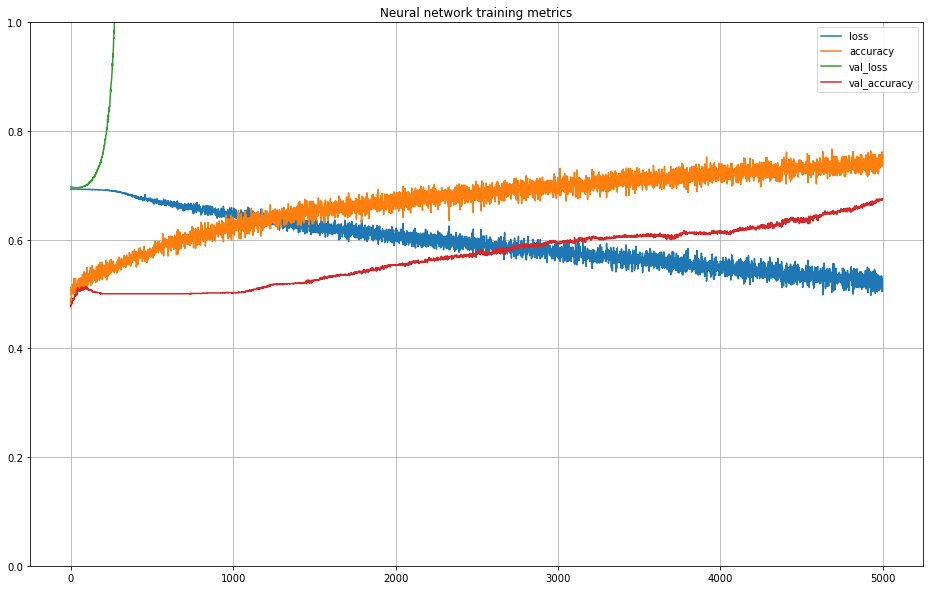

In [16]:
pd.DataFrame(history.history).plot(figsize = (16, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Neural network training metrics")
plt.show()

> If the loss does not look like it has reached a minimum (being stable on the end), it suggests we can train the network further.

> It is normal that the accuracy for the training set is higher than for the validation set, but they might be close. If not, there is overfitting!

#### Evaluate the performance with test set

In [28]:
model.evaluate(X_test, y_test, return_dict=True)

63/63 [==============================] - 0s 2ms/step - loss: 13.6231 - accuracy: 0.6745


{'loss': 13.62312126159668, 'accuracy': 0.6744999885559082}